In [1]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import os

%matplotlib inline
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.inception_v3 import InceptionV3
from keras import backend as K 
import random
import urllib.request
import matplotlib.image as mpimg

from skimage.filters import rank, threshold_otsu
from skimage import io
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # had to modify this line
from keras.utils.image_utils import img_to_array # had to modify this line
from keras.utils import np_utils
from sklearn.datasets import load_files   
from tqdm import tqdm
from collections import Counter
from skimage.morphology import closing, square, disk
#to see full text:
pd.set_option("display.max_colwidth", 1)
from termcolor import colored
print(colored("\nNECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))


NECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...


In [2]:
batch_size = 32
img_height = 224
img_width = 224

In [3]:
path = pathlib.Path("C:/Users/Anshi/OneDrive/Documents/Glaucoma/Training Data")
# For train data set
train_ds = image_dataset_from_directory(path, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 2997 files belonging to 2 classes.
Using 2398 files for training.


In [4]:
# For validatation data set
val_ds = image_dataset_from_directory(path, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=0.2, 
                                      subset='validation')

Found 2997 files belonging to 2 classes.
Using 599 files for validation.


In [5]:
input_shape=(224,224,3)
batch_size=64
classes=2

In [6]:
from tensorflow.keras.applications import DenseNet121
dense = DenseNet121(weights = "imagenet", include_top = False, input_shape=(224,224,3))

In [7]:
for layer in dense.layers[:121]:
    layer.trainable = False

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(dense)
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "sigmoid"))

In [9]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
patience = 1
stop_patience = 3
factor = 0.5
#tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("densenet121.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)]

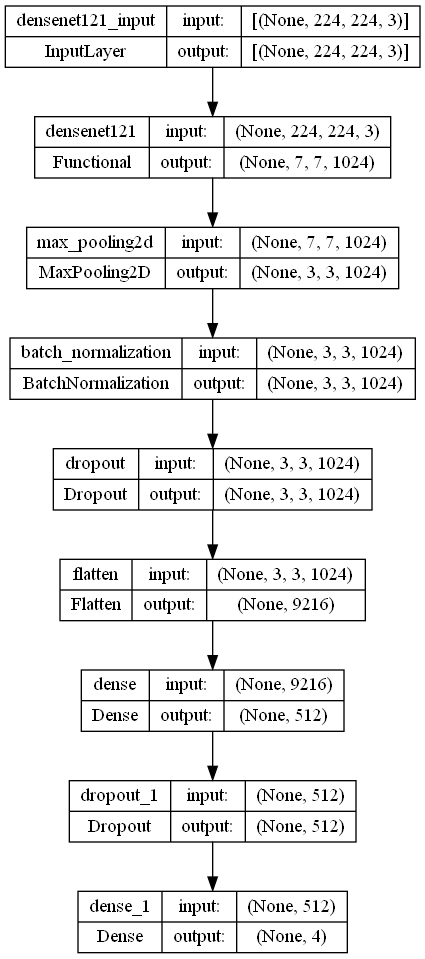

In [11]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='cnn-plant.png', show_shapes=True)

In [ ]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 15, verbose = 1, callbacks = callbacks)

Epoch 1/15
75/75 [==============================] - 373s 5s/step - loss: 1.2934 - accuracy: 0.7477 - val_loss: 7.0580 - val_accuracy: 0.6060 - lr: 0.0010
Epoch 2/15
75/75 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.8299
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
75/75 [==============================] - 381s 5s/step - loss: 0.4697 - accuracy: 0.8299 - val_loss: 15.5544 - val_accuracy: 0.5125 - lr: 0.0010
Epoch 3/15
75/75 [==============================] - 390s 5s/step - loss: 0.3372 - accuracy: 0.8620 - val_loss: 0.5006 - val_accuracy: 0.8464 - lr: 5.0000e-04
Epoch 4/15
75/75 [==============================] - 371s 5s/step - loss: 0.2919 - accuracy: 0.8703 - val_loss: 0.2779 - val_accuracy: 0.8865 - lr: 5.0000e-04
Epoch 5/15
75/75 [==============================] - 359s 5s/step - loss: 0.2759 - accuracy: 0.8812 - val_loss: 0.2535 - val_accuracy: 0.8915 - lr: 5.0000e-04
Epoch 6/15
75/75 [==============================] - 376s 5

In [8]:
model.save("Modeleye1.h5")

NameError: name 'model' is not defined

In [ ]:
epochs=15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
preformance = model.evaluate(val_ds)

['glaucoma', 'normal']
actual label: normal


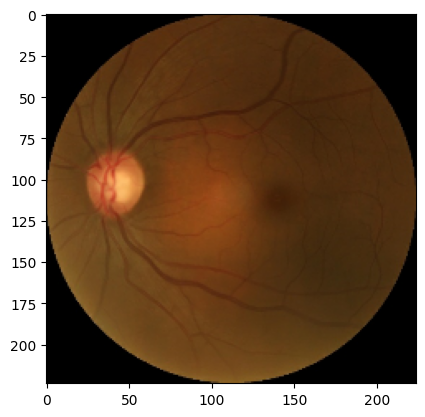

In [6]:
labels = train_ds.class_names
print(labels)
for images_batch, labels_batch in val_ds.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])

In [10]:
model=tf.keras.models.load_model('C:/Users/Anshi/Documents/Modeleye1.h5')

<class 'tensorflow.python.framework.ops.EagerTensor'>
actual label: normal
1/1 [==============================] - 3s 3s/step
predicted label: normal


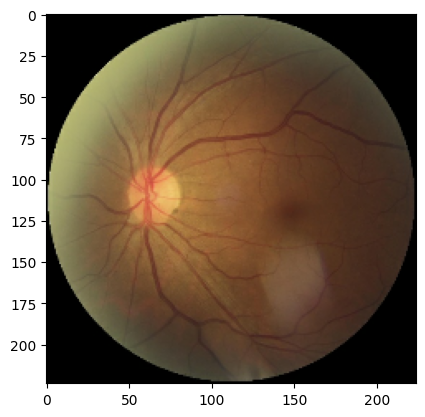

In [17]:
labels = train_ds.class_names
labels
for images_batch, labels_batch in val_ds.take(1):
    print(type(images_batch[0]))
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

In [14]:
from tensorflow import expand_dims, newaxis

def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 185ms/step


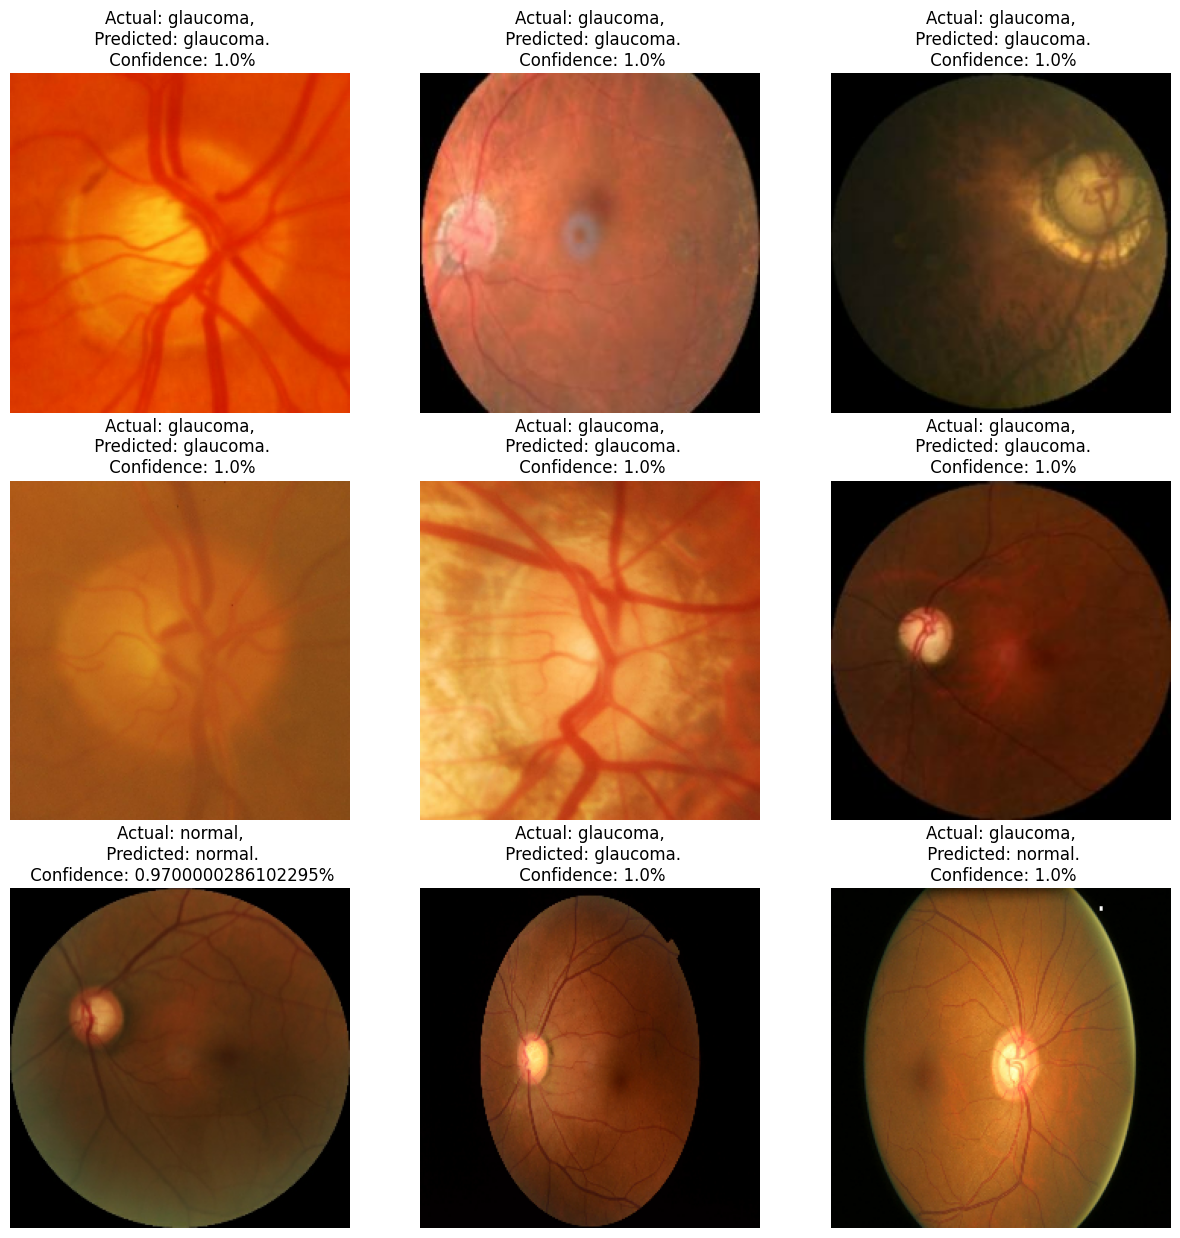

In [15]:
plt.figure(figsize=(15, 15))

for images, lbs in val_ds.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")